# Carbonate Species versus pH

In [1]:
% setup environment
% clear data and number format
clear; format short e
% set path to equilibrium solver
txt=pwd; n=length(txt); rootpath=txt;
n=strfind(rootpath,"USERS"); rootpath=txt(1:n-2);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB'];
addpath(JEQUILIBpath);
% turn off warnings
warning off
%graphics_toolkit ("notebook"); 
graphics_toolkit ("plotly"); 

In [2]:
% database 
database=['phreeqc.dat'];

In [3]:
Ka1=10^-6.3; Ka2=10^-10.3; CT=1e-3; pH=2:0.1:14; H=10.^-pH;

% Define PHREEQC database
database = 'phreeqc.dat';

% Define minerals to consider
minerals = [{'calcite'}]; 
totalvector=[CT; 1e-9];
totalnames=[{'C(4)'}; {'Ca'}];

% Define pH range
pH = 2:0.1:14; 
pe = 20.75 - pH;  

% Set temperature 
T = 25;  
show=0; % this should show the PHREEQC output to the screen. works in Matlab but not Octave

% Define species to track
speciesexport = [{'CO3-2'}; {'HCO3-'};{'CO2'}]; % pH-dependent species

% Acid addition (not used in this case)
acid = [];  

% pH variation setting (1 = fixed, 0 = free)
pHfixcheck = 0; 

%totalvector = zeros(1, length(pHrange));

for i=1:length(pH)

[solutionspeciesconcs, speciesnames] = ...
    runPHREEQCv3(T, pH(i), pe(i), totalnames, totalvector, minerals, speciesexport, database, show, [], 0);
    H2CO3(i) = solutionspeciesconcs(3);  
    HCO3(i) = solutionspeciesconcs(2);   
    CO3(i) = solutionspeciesconcs(1);    

end


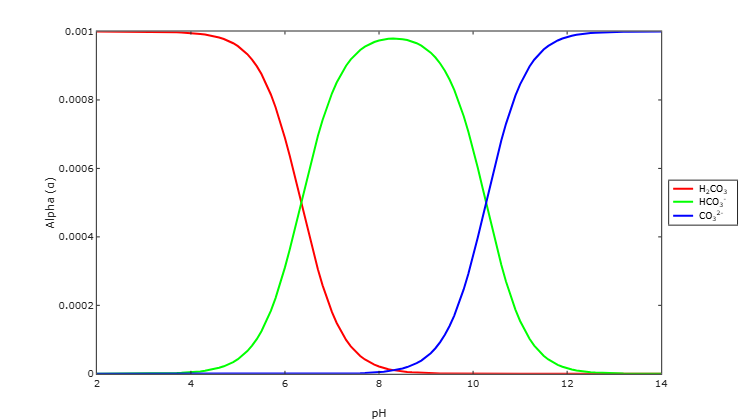

In [4]:
figure;
plot(pH, H2CO3, 'r', 'LineWidth', 2); hold on;
plot(pH, HCO3, 'g', 'LineWidth', 2);
plot(pH, CO3, 'b', 'LineWidth', 2);
xlabel('pH');
ylabel('Alpha (\alpha)');
legend('H{_2}CO{_3}', 'HCO{_3}^-', 'CO{_3}^{2-}', 'Location', 'EastOutside');
title('Carbonate Species Distribution as a Function of pH');